In [1]:
import math, os
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as mod_sel
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scores.csv')

In [24]:
X = df.loc[:,['English','Math', 'Science']].transpose()  # Features to use for regression
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
English,77,81,74,89,78,77,75,84,79,82,...,69,65,67,69,75,75,65,75,72,74
Math,72,67,74,64,71,67,72,68,75,70,...,77,83,77,80,78,81,84,77,82,75
Science,75,68,72,68,74,68,75,73,79,72,...,73,77,74,74,72,77,77,73,79,72


In [14]:
pearson_correlation = np.corrcoef(df['Math'], df['English'])
pearson_correlation


array([[ 1.        , -0.87824373],
       [-0.87824373,  1.        ]])

In [31]:
Rxx = X.dot(X.transpose())/100
mux = X.mean(axis = 1)
Cxx = Rxx - np.outer(mux, mux)
Cxx

,English,Math,Science
English,34.4236,-27.2376,-3.5922
Math,-27.2376,27.9416,5.9952
Science,-3.5922,5.9952,7.0419


In [32]:
sigma_xy = -27.2376
sigma_x = np.sqrt(27.9416)
sigma_y = np.sqrt(34.4236)
pearson_xy = sigma_xy / (sigma_x * sigma_y)
pearson_xy

-0.878243731772637

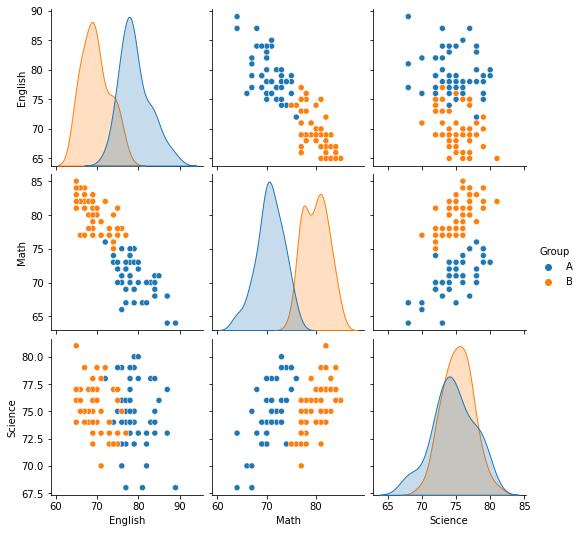

In [6]:
import seaborn as sb
sb.pairplot(df, hue='Group')

In [7]:
regressor = lm.LinearRegression()
param_default = regressor.get_params()
print('Default hyper parameters: ', param_default)

param = {'fit_intercept':True }

regressor.set_params(**param)

Default hyper parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


LinearRegression()

In [8]:
X = df[['Math']]
y = df['English']

X_train, X_test, y_train, y_test = mod_sel.train_test_split(X, y, test_size=0.3, random_state=5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

mse = ((y_test - y_pred)**2).mean()
# mse = met.mean_squared_error(y_test, y_pred)
mse_norm = mse/y_test.var()
exp_var = ((y_pred-y_test.mean())**2).mean()/((y_test-y_test.mean())**2).mean()
r_square = 1 - mse_norm

mse_train = ((y_train - y_pred_train)**2).mean()
# mse_train = met.mean_squared_error(y_train, y_pred_train)
mse_norm_train = mse_train/y_train.var()
exp_var_train = ((y_pred_train-y_train.mean())**2).mean()/((y_train-y_train.mean())**2).mean()
r_square_train = 1 - mse_norm_train

print( "Normalized.MSE = %f, %f" % (round(mse_norm,4), round(mse_norm_train,4)) )
print( "R2 = %f, %f" % (round(r_square,4), round(r_square_train,4)) )
print( "Explained Var. = %f, %f" % (round(exp_var,4), round(exp_var_train,4)) )

Normalized.MSE = 0.245700, 0.217100
R2 = 0.754300, 0.782900
Explained Var. = 0.913300, 0.779800


In [9]:
print( "theta_0 (intercept) = %f" % (regressor.intercept_) )
print( "theta[1~M] = " + str(regressor.coef_) )
print( "theta_tilde = " + str( np.concatenate( ([regressor.intercept_], regressor.coef_)) ))

theta_0 (intercept) = 150.041373
theta[1~M] = [-1.00584379]
theta_tilde = [150.04137304  -1.00584379]


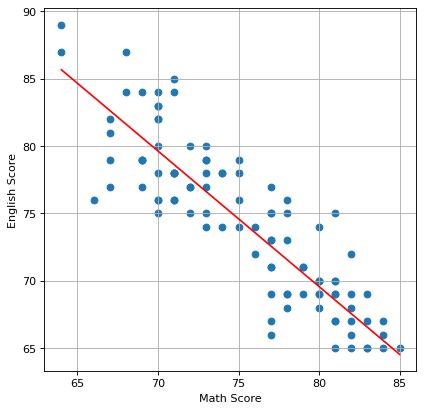

In [10]:
## (7) Confusion matrix & performance report
plt.figure(num=None, figsize=(6, 6), dpi=80) 

x = df['Math']
plt.scatter(x, y)

y_intercept = regressor.intercept_
gradient = regressor.coef_[0]
t = np.arange(min(x), max(x)+1)
plt.plot(t, gradient*t + y_intercept, 'r')

plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.grid()
plt.show()

In [11]:
X_mat = X.values  # 데이터 프레임을 행렬로 변환
X_tilde = np.c_[np.ones([X_mat.shape[0],1]), X_mat]  # 앞에 1을 추가하여 첨가행렬 구성

Rxx = X_tilde.transpose() @ X_tilde # 자기 상관행렬
rxy = X_tilde.transpose() @ y.values # 상호 상관벡터
theta_tilde = np.linalg.inv(Rxx) @ rxy # 최적 파라미터 Theta_tilde
print("theta_tilde = " + str(theta_tilde) )

theta_tilde = [147.80328972  -0.97480459]
